<a href="https://colab.research.google.com/github/ytling/4171/blob/gh-pages/Imbalance_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/colabData')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

# Imbalance data 

example dataset: titanic 

When there is a modest class imbalance like 4:1 in the example above it can cause problems. \


Step:
0.  Observing the dataset.
1.  pre-processing the dataset 
2.  Resampling.we will use the oversamplying as the small data size and try the  SMOTE methond with the `imbalanced-learn` library.
3. measure method: 
  + Confusion Matrix
  + F1 Score (or F-score): A weighted average of precision and recall.
  + Kappa (or Cohen’s kappa)
  + ROC Curves: thresholds of these values


reference:[mlmastery](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

In [6]:
df = pd.DataFrame(pd.read_csv('train.csv'))

## Section0
"check"
1. type of the variables
2. missing data 

In [7]:
# split the variables into character and numerical
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
character = df.select_dtypes(exclude=['int64','float64']).columns.tolist()
print('list the numeric ', numeric)
print('list the category', character)

list the numeric  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
list the category ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [8]:
print('null value', df.isnull().sum())
 # a lot of missing in age, however, it is possible to find more information

null value PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print('--age--')
print(df.Age.describe())
print()

--age--
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64



In [10]:
df['Age'] = df['Age'].fillna(0)

In [11]:
import plotly.express as px

df_Age = df.loc[:,['Age','Survived']]
fig = px.histogram(df_Age, x="Age", color="Survived" )
fig.show()

In [12]:
df_Age['Age'] = pd.cut(df.Age, [0,0.1, 17, 60,max(df.Age)], right= True, include_lowest=True)
df_Age.groupby( 'Age', as_index=True).agg(
    {
    'Survived': [np.mean, len]
     }
)

Survived     
                   mean  len
Age                         
(-0.001, 0.1]  0.293785  177
(0.1, 17.0]    0.539823  113
(17.0, 60.0]   0.386874  579
(60.0, 80.0]   0.227273   22

In [13]:
df_SibSp = df.loc[:,['Survived','SibSp']]
df_SibSp.groupby('SibSp', as_index = True).agg(
    {
    'Survived': [np.mean,len]
    }
)
                

Survived     
           mean  len
SibSp               
0      0.345395  608
1      0.535885  209
2      0.464286   28
3      0.250000   16
4      0.166667   18
5      0.000000    5
8      0.000000    7

In [14]:
df_SibSp['SibSp_cut'] = pd.cut(df.SibSp, [0,1,9], right = False, include_lowest=True)
df_SibSp.groupby('SibSp_cut', as_index = True).agg(
    {'Survived': [np.mean,len]}
)
        

Survived     
               mean  len
SibSp_cut               
[0, 1)     0.345395  608
[1, 9)     0.466431  283

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df_Parch = df.loc[:,['Survived','Parch']]
df_Parch.groupby('Parch', as_index = True).agg(
    {
    'Survived': [np.mean,len]
    }
)

Survived     
           mean  len
Parch               
0      0.343658  678
1      0.550847  118
2      0.500000   80
3      0.600000    5
4      0.000000    4
5      0.200000    5
6      0.000000    1

In [17]:
df_Parch['Parch_cut'] = pd.cut(df.SibSp, [0,1,7], right = False, include_lowest=True)
df_Parch.groupby('Parch_cut', as_index = True).agg(
    {'Survived': [np.mean,len]}
)
      

Survived     
               mean  len
Parch_cut               
[0, 1)     0.345395  608
[1, 7)     0.478261  276

In [18]:
# a new df 
df['alone'] = df['SibSp']+ df['Parch']
df_alone = df[['alone','Survived']]
df_alone['alone_cut'] =pd.cut(df.alone, [0,0.9,10],right=True, include_lowest=True).cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_alone.groupby('alone', as_index = True).agg(
    {
    'Survived': [np.mean,len]
    }
)

Survived     
           mean  len
alone               
0      0.303538  537
1      0.552795  161
2      0.578431  102
3      0.724138   29
4      0.200000   15
5      0.136364   22
6      0.333333   12
7      0.000000    6
10     0.000000    7

In [20]:
df_alone.groupby('alone_cut', as_index = True).agg(
    {
    'Survived': [np.mean,len]
    }
)

Survived     
               mean  len
alone_cut               
0          0.303538  537
1          0.505650  354

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'alone'],
      dtype='object')

In [22]:
df_train = df.copy()
df_train = pd.get_dummies(df_train, columns=["Embarked",'Pclass'])

In [37]:
df_train.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'alone', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Alone'],
      dtype='object')

In [23]:
df_train['Alone'] = df_alone.alone_cut

In [24]:
df_train['Sex'] = df['Sex'].apply(lambda x: 0 if x=='female' else 1 )

In [25]:
df_train.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'alone', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Alone'],
      dtype='object')

### variable summary 
[-]: drop \
[.]: add as the original \
[^.]: changed and added  
[+]: add the new variable \ 

--- 
Shape: 892*12
* survived: 0 --> dead; 1---> live

---
numeric variables

* [.]Age: float with missing 178.
* [-]SibSp: the number of the sib
* [-]Parch: the number of children
* [-]Fare: 
---
categorical variables
* [.]sex: male; female
* [-]Ticket: code of the ticket
* [-]Cabin: code of the cab
  + Cabin_Site: [A-Z]+[1-5], indicate the site of the ship. 
    however, it has 668 missing data decide to drop
* [.]Embarked: Embarked_C = Cherbourg; Embarked_Q = Queenstown; Embarked_S = Southampton
* [.]Pclass: class of passagers belong to 
* [+]Alone: 0 no accompanied, >0.9 with accompanied. 

## Section2 

After pick the initial features. We want to applied the decision tree method futher to determined the ones with higher information score. 

After the applied, `Age, Sex,Pclass` thee can be used. 

Next, we will do the rebalance by over and under sampling. 



In [26]:
from sklearn.compose import make_column_transformer

In [27]:
selected_features = ['Age','Embarked_C',	'Embarked_Q','Embarked_S','Sex','Pclass_1', 'Pclass_2', 'Pclass_3','Alone']
X = df_train[selected_features]
y = df.Survived

In [29]:
y.mean()

0.3838383838383838

oversampying, undersamplying and combine the over and under samplying 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTEN

In [159]:
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='average_precision')

tree_search.fit(X,y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Tree best score : 0.8079770030033119


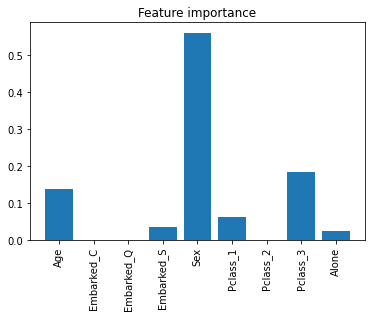

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt


tree_best_parameters = tree_search.best_params_
tree_optimized = tree.DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X,y)

train_columns = list(X.columns)

fig, ax = plt.subplots( figsize=(6,4))
ax.bar(range(len(X.columns)),tree_optimized.feature_importances_ )
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
ax.set_title("Feature importance")
plt.show()

when we do the samplying, need to pay attention to compare the result. 

In [60]:
# Oversample and plot imbalanced dataset with SMOTE :repeat some samples and balance the
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
Sample_X, Sample_y = oversample.fit_resample(X, y)
# summarize the new class distribution
print(Counter(Sample_y))

Counter({1: 51, 0: 49})
Counter({1: 51, 0: 51})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
plt.subplot(222)
X_resampled, y_resampled = RandomOverSampler().fit_sample(X, y)
plt.scatter(X_resampled[:, 0 ], X_resampled[:, 1], c=y_resampled, cmap=plt.cm.Paired)
plt.title("Resampling using RandomOverSampler")
#RMOT过采样
plt.subplot(223)
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
plt.scatter(X_resampled[:, 0 ], X_resampled[:, 1], c=y_resampled, cmap=plt.cm.Paired)
plt.title("Resampling using SMOTE")

plt.show()

In [32]:
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='average_precision' )

tree_search.fit(X,y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Tree best score : 0.8856827576004479


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


tree_best_parameters = tree_search.best_params_
tree_optimized = tree.DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X,y)

train_columns = list(X.columns)

fig, ax = plt.subplots( figsize=(6,4))
ax.bar(range(len(X.columns)),tree_optimized.feature_importances_ )
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
ax.set_title("Feature importance")
plt.show()